### Toymodel Train Test Evaluation

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import Solver, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


#### Set up dataloader, model, solver

In [2]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir)

In [3]:
generator = ToyGenerator(in_len=8, out_len=12)
discriminator = ToyDiscriminator()

In [4]:
solver = Solver(generator, discriminator, 
                loss_fns={'norm': nn.L1Loss, 'gan': nn.BCEWithLogitsLoss},
                optims_args={'generator': {'lr': 1e-2}, 'discriminator': {'lr': 1e-2}})

#### Training

In [5]:
solver.train(trainloader, epochs = 500, checkpoint_every=10, steps = {'generator': 1, 'discriminator': 1})

G_gan: 0.557	G_norm: 0.274	G_total: 0.832	D_real: 0.618	D_fake: 0.884	D_total: 1.502	
G_gan: 0.664	G_norm: 0.242	G_total: 0.906	D_real: 0.613	D_fake: 0.749	D_total: 1.362	
G_gan: 0.687	G_norm: 0.225	G_total: 0.911	D_real: 0.635	D_fake: 0.696	D_total: 1.331	
G_gan: 0.678	G_norm: 0.186	G_total: 0.864	D_real: 0.649	D_fake: 0.724	D_total: 1.373	
G_gan: 0.622	G_norm: 0.150	G_total: 0.772	D_real: 0.621	D_fake: 0.784	D_total: 1.405	
G_gan: 0.647	G_norm: 0.130	G_total: 0.776	D_real: 0.599	D_fake: 0.756	D_total: 1.355	
G_gan: 0.649	G_norm: 0.134	G_total: 0.783	D_real: 0.646	D_fake: 0.735	D_total: 1.382	
G_gan: 0.683	G_norm: 0.108	G_total: 0.791	D_real: 0.665	D_fake: 0.714	D_total: 1.379	
G_gan: 0.671	G_norm: 0.125	G_total: 0.796	D_real: 0.670	D_fake: 0.728	D_total: 1.398	
G_gan: 0.678	G_norm: 0.112	G_total: 0.790	D_real: 0.667	D_fake: 0.711	D_total: 1.378	
G_gan: 0.692	G_norm: 0.102	G_total: 0.794	D_real: 0.679	D_fake: 0.698	D_total: 1.377	
G_gan: 0.663	G_norm: 0.124	G_total: 0.787	D_real: 0.64

#### Test

In [6]:
output = solver.test(trainloader)

#### Evaluation
visualization of predicted trajectories

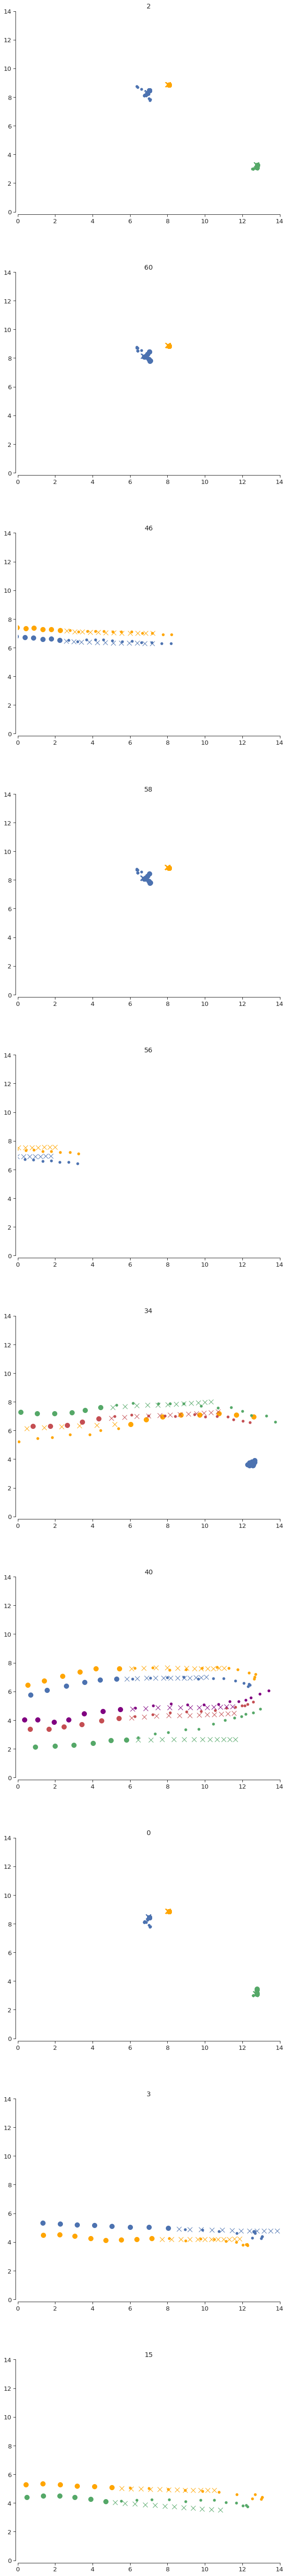

In [8]:
vis = Visualization()
ll = vis.trajectories(output, scenes=[10])